In [28]:
from mastodon import Mastodon          
import re               
from gensim.models import Word2Vec    
from sklearn.decomposition import PCA 
import gensim
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from credentials import * 

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def mastodon_setup():
    Mastodon.create_app (
        'myapp',
        api_base_url = 'https://witches.live',
        to_file = 'clientcred.secret'
    )
    mastodon = Mastodon(
        client_id = 'clientcred.secret',
        api_base_url = 'https://witches.live'
    )
    #mastodon.log_in(
     #   EMAIL,
      #  PASSWORD,
       # to_file = 'usercred.secret'
    #)
    return mastodon

In [3]:
extractor = mastodon_setup()

In [4]:
import html2text

In [5]:
def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 += ele     
    return str1  

In [6]:
import threading
from tqdm import tqdm
import os
import sys
import getopt
import time

sleep_thread = threading.Event()

tweets = []

def get_user_tweets(tweets, mastodon, user_id, limit):
    h = html2text.HTML2Text()
    h.ignore_links = False
    statuses = mastodon.account_statuses(id=user_id, exclude_replies=True, limit=limit)
    for stat in statuses:
        text = h.handle(stat.content)#.replace('\n', ' ')
        tweets.append(listToString(text))

In [7]:
start = 15000
end = 20000

for i in tqdm(range(start, end)):
    try:
        get_user_tweets(tweets, extractor, i, 100)
        sleep_thread.wait(timeout=1)
    except Exception:
        pass  

 41%|████      | 4093/10000 [1:55:06<2:45:29,  1.68s/it]

KeyboardInterrupt: 

In [8]:
len(tweets)

43851

In [9]:
print("3 recent tweets:\n")
for tweet in tweets[:3]:
    print(tweet)

3 recent tweets:

current mood:




He's absolutely right tbh if it doesn't look at least a bit haunted i'm not
interested




Might get really into learning about Chernobyl




In [10]:
df = pd.DataFrame({"Tweets": tweets})
df.head()

,Tweets
0,current mood:\n\n
1,\n\nHe's absolutely right tbh if it doesn't lo...
2,\n\nMight get really into learning about Chern...
3,\n\nLifehack: Pretend you have friends who lov...
4,\n\nBanksy manages to make something even less...


In [11]:
#df.to_csv("tweets_witches_live_15000_19093.csv", index=False)

In [ ]:
df.to_csv("tweets_witches_live_15000_19093.csv", index=False)

#### Tokenizing Tweets (word2vec)

In [12]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens


tokenized = []

for tw in tweets:
    tokens = preprocess(tw)
    tokenized.append(tokens)

tokenized[0:4]

[['current', 'mood', ':'],
 ["He's",
  'absolutely',
  'right',
  'tbh',
  'if',
  'it',
  "doesn't",
  'look',
  'at',
  'least',
  'a',
  'bit',
  'haunted',
  "i'm",
  'not',
  'interested'],
 ['Might', 'get', 'really', 'into', 'learning', 'about', 'Chernobyl'],
 ['Lifehack',
  ':',
  'Pretend',
  'you',
  'have',
  'friends',
  'who',
  'love',
  'to',
  'edit',
  'documents',
  'with',
  'you',
  'by',
  'having',
  'it',
  'open',
  'in',
  'multiple',
  'tabs']]

###### Train

In [13]:
model = Word2Vec(tokenized, min_count=1)
model.save("tweets.model")
model

In [14]:
words = list(model.wv.vocab)
words[0:5]

['current', 'mood', ':', "He's", 'absolutely']

In [15]:
len(words)

139363

In [17]:
m = model['mood']
m

/Users/leyla/opt/anaconda3/envs/umap_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.23783132, -0.02541081,  0.27073944, -0.00061733,  0.12067529,
        0.07093004,  0.07268877,  0.23185414, -0.199417  , -0.07810611,
        0.00114782, -0.01853821,  0.0072264 ,  0.19450283,  0.34060383,
       -0.28461334,  0.14390291, -0.26055992, -0.06021281, -0.01559021,
        0.26657504,  0.01146885, -0.0036039 , -0.14243825,  0.3279449 ,
        0.0325592 ,  0.3495195 ,  0.27577686, -0.34441584, -0.1363062 ,
        0.4989885 , -0.44722173, -0.12845711,  0.12632315,  0.07041902,
       -0.10758317, -0.1519138 ,  0.03668051,  0.13742   , -0.02716763,
       -0.1595959 ,  0.30614963, -0.10397099, -0.02430457, -0.39114934,
        0.4478712 , -0.12804796,  0.23189385, -0.15709744,  0.33277217,
       -0.36761558,  0.40739283, -0.30917615, -0.11901412,  0.28646812,
        0.1534171 , -0.3593329 , -0.23430762,  0.26794687, -0.01369456,
       -0.02691155,  0.17844017,  0.09109624,  0.14260419,  0.09608949,
       -0.10288426, -0.21813346, -0.02065466,  0.36006072, -0.00

###### Load model

In [29]:
model = gensim.models.Word2Vec.load("tweets.model")
model

###### PCA

In [18]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/Users/leyla/opt/anaconda3/envs/umap_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


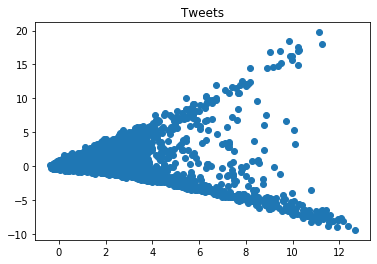

In [19]:
fig, ax = plt.subplots()
ax.plot(result[:, 0], result[:, 1], 'o')
ax.set_title('Tweets')
plt.show()

###### UMAP

In [20]:
import umap.umap_ as umap

In [21]:
reducer = umap.UMAP(random_state=42)
X_embedded = reducer.fit_transform(X)

/Users/leyla/opt/anaconda3/envs/umap_env/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../opt/anaconda3/envs/umap_env/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/Users/leyla/opt/anaconda3/envs/umap_env/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../opt/a

In [22]:
matplotlib.rcParams['figure.figsize'] = [16, 16]

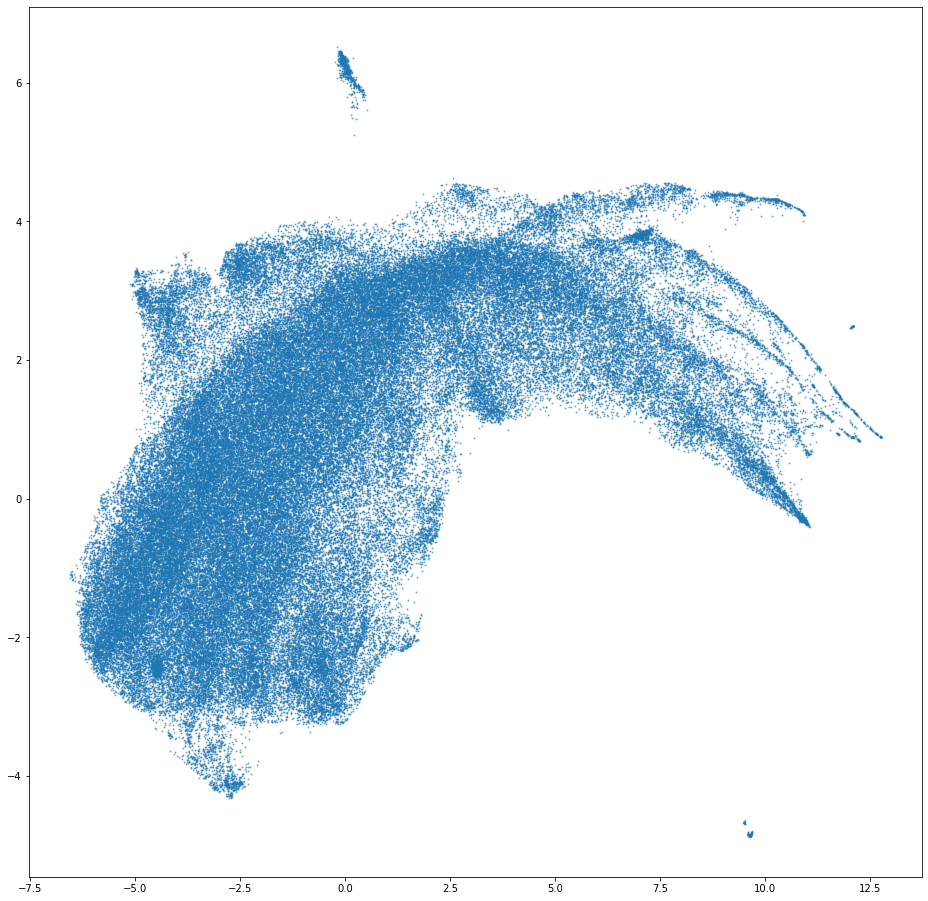

In [23]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], s=1, alpha=0.5)

In [24]:
import datashader as ds
from colorcet import *
from datashader import transfer_functions as tf

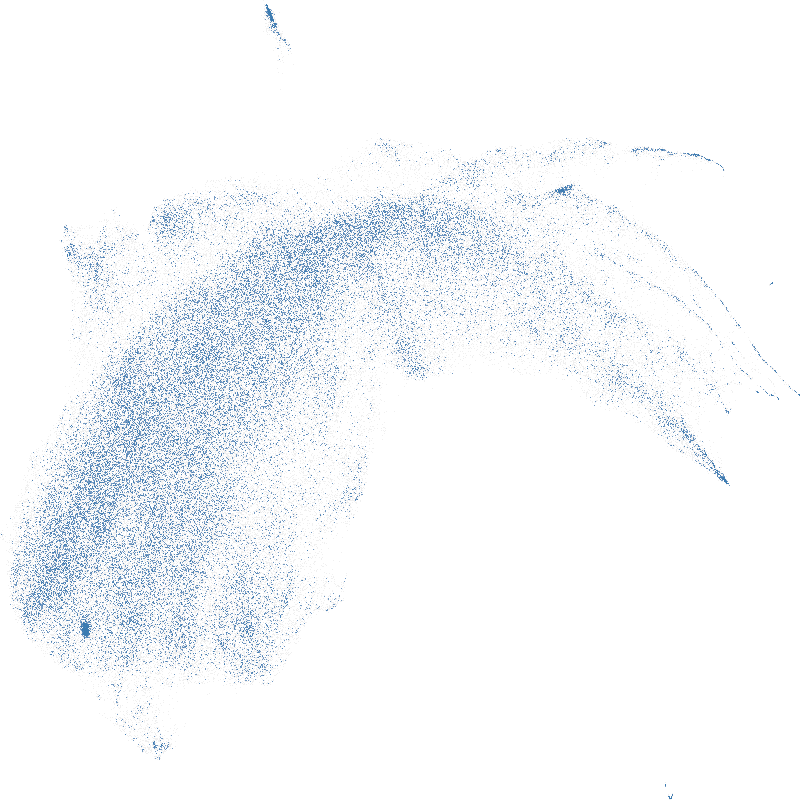

In [25]:
agg = ds.Canvas(800, 800).points(pd.DataFrame(data=X_embedded, columns=('x', 'y')), 'x', 'y')
tf.set_background(tf.shade(agg, cmap=blues),"white")

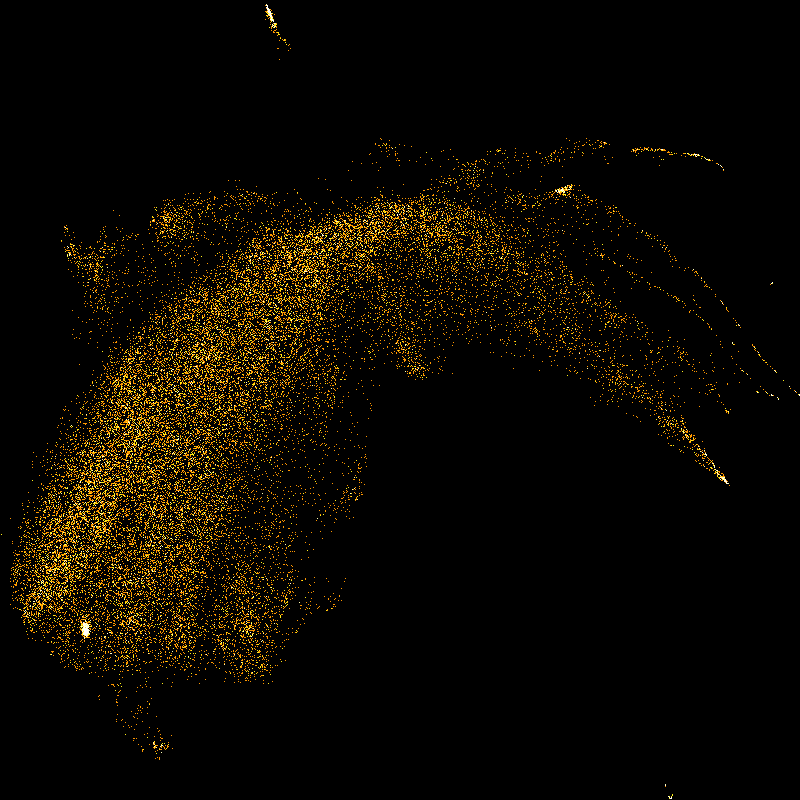

In [26]:
agg = ds.Canvas(800, 800).points(pd.DataFrame(data=X_embedded, columns=('x', 'y')), 'x', 'y')
tf.set_background(tf.shade(agg, cmap=fire),"black")

###### tSNE (do not use)

In [95]:
from tsne import tsne

Y = tsne(X, 2, 50, 30.0)

ModuleNotFoundError: No module named 'tsne'

In [ ]:
fig, ax = plt.subplots()
ax.plot(Y[:, 0], Y[:, 1], 'o')
ax.set_title('Tweets')
ax.set_yticklabels([])
ax.set_xticklabels([]) 
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(Y[:, 0], Y[:, 1], 'o')
ax.set_title('Tweets')
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks

words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
plt.show()